### Problem 1

In [10]:
from sympy import symbols, laplace_transform, exp, Heaviside, Eq

t, s, a, b = symbols('t s a b')
x1_t = exp(-a * t) * Heaviside(t)
x2_t = exp(-b * t) * Heaviside(t)
X1_s = laplace_transform(x1_t, t, s)[0]
X2_s = laplace_transform(x2_t, t, s)[0]
X_s = X1_s + X2_s

X1_s, X2_s, Eq(X_s, X1_s + X2_s)

(1/(a + s), 1/(b + s), True)

In [11]:
from sympy import cos, sin, Function, symbols, laplace_transform, exp, Heaviside

omega1, omega2 = symbols('omega1 omega2')
x1_t_b = (2 * exp(a * t) - exp(b * t)) * Heaviside(t)
X1_s_b = laplace_transform(x1_t_b, t, s)[0]
x2_t_b = Heaviside(t) - Heaviside(t - 1)
X2_s_b = laplace_transform(x2_t_b, t, s)[0]
x3_t_b = t * exp(a * t) * Heaviside(t)
X3_s_b = laplace_transform(x3_t_b, t, s)[0]
x4_t_b = cos(omega1 * t) * cos(omega2 * t) * Heaviside(t)
X4_s_b = laplace_transform(x4_t_b, t, s)[0]

X1_s_b, X2_s_b, X3_s_b, X4_s_b

(-1/(-b + s) + 2/(-a + s),
 1/s - exp(-s)/s,
 (-a + s)**(-2),
 1/(4*(I*omega1 + I*omega2 + s)) + 1/(4*(I*omega1 - I*omega2 + s)) + 1/(4*(-I*omega1 + I*omega2 + s)) + 1/(4*(-I*omega1 - I*omega2 + s)))

### Problem 2

In [12]:
from sympy import inverse_laplace_transform

X_s_a = (s + 1) / (s**2 + s + 1)
x_t_a = inverse_laplace_transform(X_s_a, s, t)

x_t_a

(sqrt(3)*exp(-t/2)*sin(sqrt(3)*t/2)/3 + exp(-t/2)*cos(sqrt(3)*t/2))*Heaviside(t)

In [13]:
from sympy import inverse_laplace_transform

X_s_b = (s + 2) / ((s + 1) * (s**2 + 4))
x_t_b = inverse_laplace_transform(X_s_b, s, t)

x_t_b

(3*sin(2*t)/5 - cos(2*t)/5)*Heaviside(t) + exp(-t)*Heaviside(t)/5

### Problem 3

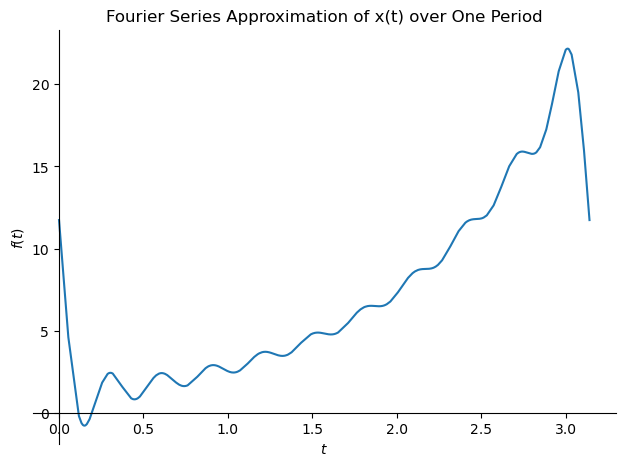

((-1 + exp(pi))/pi,
 2*(2*n*exp(pi)*sin(2*pi*n)/(4*n**2 + 1) + exp(pi)*cos(2*pi*n)/(4*n**2 + 1) - 1/(4*n**2 + 1))/pi,
 2*(-2*n*exp(pi)*cos(2*pi*n)/(4*n**2 + 1) + 2*n/(4*n**2 + 1) + exp(pi)*sin(2*pi*n)/(4*n**2 + 1))/pi,
 2*((-1/5 + exp(pi)/5)*cos(2*t) + (-1/17 + exp(pi)/17)*cos(4*t) + (-1/37 + exp(pi)/37)*cos(6*t) + (-1/65 + exp(pi)/65)*cos(8*t) + (-1/101 + exp(pi)/101)*cos(10*t) + (-1/145 + exp(pi)/145)*cos(12*t) + (-1/197 + exp(pi)/197)*cos(14*t) + (-1/257 + exp(pi)/257)*cos(16*t) + (-1/325 + exp(pi)/325)*cos(18*t) + (-1/401 + exp(pi)/401)*cos(20*t))/pi + 2*((2/5 - 2*exp(pi)/5)*sin(2*t) + (4/17 - 4*exp(pi)/17)*sin(4*t) + (6/37 - 6*exp(pi)/37)*sin(6*t) + (8/65 - 8*exp(pi)/65)*sin(8*t) + (10/101 - 10*exp(pi)/101)*sin(10*t) + (12/145 - 12*exp(pi)/145)*sin(12*t) + (14/197 - 14*exp(pi)/197)*sin(14*t) + (16/257 - 16*exp(pi)/257)*sin(16*t) + (18/325 - 18*exp(pi)/325)*sin(18*t) + (20/401 - 20*exp(pi)/401)*sin(20*t))/pi + (-1 + exp(pi))/pi,
 <sympy.plotting.plot.Plot at 0x1f5c02e6b10>)

In [14]:
from sympy import integrate, cos, sin, pi, symbols, plot, summation

t, n = symbols('t n')
T0 = pi
x_t = exp(t)
omega0 = 2 * pi / T0
a0 = (1 / T0) * integrate(x_t, (t, 0, T0))
an = (2 / T0) * integrate(x_t * cos(n * omega0 * t), (t, 0, T0))
bn = (2 / T0) * integrate(x_t * sin(n * omega0 * t), (t, 0, T0))
N = 10
x_t_series = a0 + summation(an * cos(n * omega0 * t) + bn * sin(n * omega0 * t), (n, 1, N))

a0, an, bn, x_t_series, plot(x_t_series, (t, 0, T0), title="Fourier Series Approximation of x(t) over One Period")

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

t, n, T = sp.symbols('t n T')

T_value = 2 * sp.pi
x_t = sp.exp(-t**2)

a_0 = (1 / T_value) * sp.integrate(x_t, (t, -T_value/2, T_value/2))
a_n = (2 / T_value) * sp.integrate(x_t * sp.cos(n * (2 * sp.pi / T_value) * t), (t, -T_value/2, T_value/2))
b_n = (2 / T_value) * sp.integrate(x_t * sp.sin(n * (2 * sp.pi / T_value) * t), (t, -T_value/2, T_value/2))

fourier_series = a_0 / 2
for i in range(1, 6):
    fourier_series += a_n.subs(n, i) * sp.cos(i * (2 * sp.pi / T_value) * t) + b_n.subs(n, i) * sp.sin(i * (2 * sp.pi / T_value) * t)

print(f'Fourier Series representation: {fourier_series}')

t_values = np.linspace(-np.pi, np.pi, 400)
x_t_func = sp.lambdify(t, x_t, modules='numpy')
fourier_series_func = sp.lambdify(t, fourier_series, modules='numpy')

original_values = x_t_func(t_values)
fourier_series_values = fourier_series_func(t_values)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_values, original_values, label='Original Function', color='blue')
plt.plot(t_values, fourier_series_values, label='Fourier Series Approximation', color='red', linestyle='--')
plt.title('Fourier Series Approximation of x(t)')
plt.xlabel('t')
plt.ylabel('x(t) and Fourier Series')
plt.legend()
plt.grid()
plt.show()

Fourier Series representation: sin(t)*Integral(exp(-t**2)*sin(t), (t, -pi, pi))/pi + sin(2*t)*Integral(exp(-t**2)*sin(2*t), (t, -pi, pi))/pi + sin(3*t)*Integral(exp(-t**2)*sin(3*t), (t, -pi, pi))/pi + sin(4*t)*Integral(exp(-t**2)*sin(4*t), (t, -pi, pi))/pi + sin(5*t)*Integral(exp(-t**2)*sin(5*t), (t, -pi, pi))/pi + cos(t)*Integral(exp(-t**2)*cos(t), (t, -pi, pi))/pi + cos(2*t)*Integral(exp(-t**2)*cos(2*t), (t, -pi, pi))/pi + cos(3*t)*Integral(exp(-t**2)*cos(3*t), (t, -pi, pi))/pi + cos(4*t)*Integral(exp(-t**2)*cos(4*t), (t, -pi, pi))/pi + cos(5*t)*Integral(exp(-t**2)*cos(5*t), (t, -pi, pi))/pi + erf(pi)/(4*sqrt(pi))


NameError: name 'Integral' is not defined

### Problem 4

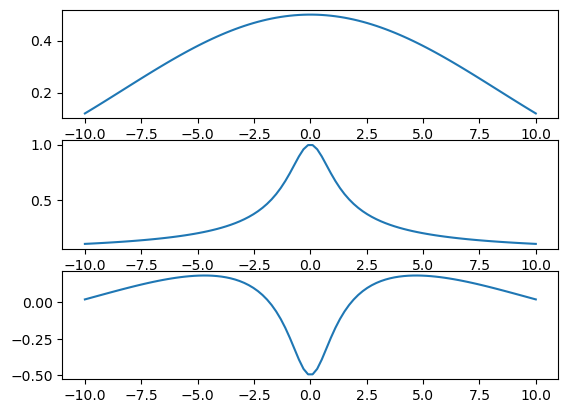

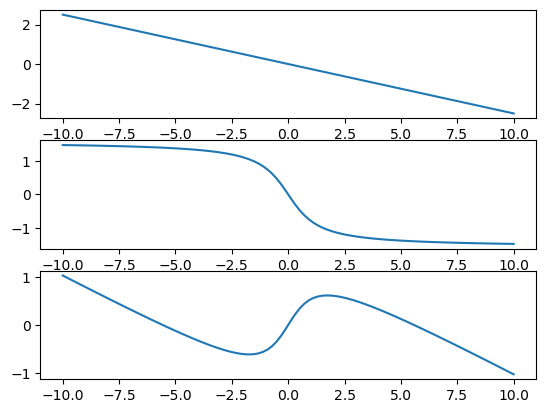

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

t, w, = sp.symbols('t w')

x = sp.Piecewise((1, sp.Abs(t) <= 1/2), (0, True))
m = x * sp.exp(-sp.I * w * t)
m

sp.integrate(m,(t,0,sp.oo))

sp.simplify(sp.integrate(m,(t,0,sp.oo)))

X = (-sp.I/w) + ((sp.I*sp.exp(-0.5*sp.I*w))/(w))
Xw = sp.lambdify(w, X, 'numpy')
wa = np.linspace(-10, 10, 100)
Xwmag = abs(Xw(wa))
Xwmag_n = 1 / np.sqrt(1 + wa**2)
plt.subplot(311)
plt.plot(wa, Xwmag)
plt.subplot(312)
plt.plot(wa, Xwmag_n)
plt.subplot(313)
plt.plot(wa, Xwmag - Xwmag_n)
plt.show()

Xw = sp.lambdify(w, X, 'numpy')
wa = np.linspace(-10, 10, 100)
Xwphase = np.angle(Xw(wa))
Xwphase_n = -np.arctan(wa)

plt.subplot(311)
plt.plot(wa, Xwphase)
plt.subplot(312)
plt.plot(wa, Xwphase_n)
plt.subplot(313)
plt.plot(wa, Xwphase - Xwphase_n)
plt.show()